In [58]:
# Importing Dependencies

import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
# Import the data

file_path = Path("./Resources/lending_data.csv")
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [60]:
# Define the X (features)

X = df.drop("loan_status", axis=1)
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [34]:
# Define the y (target) sets

y = df["loan_status"].values

In [71]:
from sklearn.model_selection import train_test_split

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() model and fit it to the training data
X_scaler = StandardScaler().fit(X_test)

In [73]:
# Transforming the training and testing data by using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [88]:
# Train a Logistic Regression model print the model score
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test) 

log_reg = confusion_matrix(y_test, y_pred)


print ("Accuracy :", accuracy_score(y_test, y_pred))

# log_reg

Accuracy : 0.9924680148576145


In [90]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

R_classifier = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
R_classifier.fit(X_train,y_train)

y_pred = R_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# cm

Accuracy: 0.9921068922822947


# Considering the two models, there does not seem to be much difference between the scores. However, considering the slight different between the scores, I believe that the Logistic Regression model should and will perform better than the Random Forest model as far as this dataset is concern.

k: 1, Train/Test Score: 0.996/0.990
k: 3, Train/Test Score: 0.995/0.993
k: 5, Train/Test Score: 0.995/0.994
k: 7, Train/Test Score: 0.994/0.994
k: 9, Train/Test Score: 0.994/0.994
k: 11, Train/Test Score: 0.994/0.995
k: 13, Train/Test Score: 0.994/0.995
k: 15, Train/Test Score: 0.994/0.995
k: 17, Train/Test Score: 0.994/0.995
k: 19, Train/Test Score: 0.994/0.995


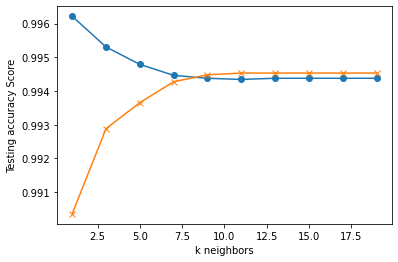

In [76]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [62]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=5 Test Acc: 0.994
